In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from scipy.signal import argrelextrema

import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.image as mpimg

from functions import Orbitload
from functions import load_yTag_data
from functions import load_data
from functions import load_Bfield
from functions import enlargeVector

In [3]:
timespan = interactive(Orbitload, Orbit = '')
print('Which timespan?')
display(timespan)

Which timespan?


interactive(children=(Text(value='', description='Orbit'), Output()), _dom_classes=('widget-interact',))

In [4]:
ProtonData = interactive(Orbitload, Orbit = '')
print('Proton dataset')
display(ProtonData)

Proton dataset


interactive(children=(Text(value='', description='Orbit'), Output()), _dom_classes=('widget-interact',))

In [5]:
answer_Orbit = timespan.kwargs['Orbit']
answer_Proton = ProtonData.kwargs['Orbit']

In [6]:
fileIntE_O = '%sEn_O'%answer_Orbit
fileIntE_S = '%sEn_S'%answer_Orbit
fileIntE_He = '%sEn_He'%answer_Orbit
fileIntE_H = '%sEn_%s_H'%(answer_Orbit, answer_Proton)
fileIntPA_O = '%sPA_O'%answer_Orbit
fileIntPA_S = '%sPA_S'%answer_Orbit
fileIntPA_He = '%sPA_He'%answer_Orbit
fileIntPA_H = '%sPA_%s_H'%(answer_Orbit, answer_Proton)
filedensO = '%sdens_O'%answer_Orbit
filedensS = '%sdens_S'%answer_Orbit
filedensHe = '%sdens_He'%answer_Orbit
filedensH = '%sdens_%s_H'%(answer_Orbit, answer_Proton)

In [7]:
# Parameters

m_O = 16*1.672*(10**(-27)); #[kg]
m_S = 32*1.67*(10**(-27)); #[kg]
m_He = 4*1.67*(10**(-27)); #[kg]
m_H = 1*1.67*(10**(-27)); #[kg]
m = [m_O, m_S, m_He, m_H] #kg
header_mag = 1
header_dens = 14
yTag_En = 13
if answer_Proton == 'HiResIon' or answer_Proton == 'LoTOFxE':
    yTag_En_H = 13
if answer_Proton == 'HiTOFxE':
    yTag_En_H = 14
yTag_PA = 14
yTag_to_intens_En_S = 2
yTag_to_intens = 3

In [8]:
# Einlesen Energy&PA:
files_E = [[fileIntE_O, yTag_En, yTag_to_intens], [fileIntE_S, yTag_En, yTag_to_intens_En_S], 
         [fileIntE_He, yTag_En, yTag_to_intens], [fileIntE_H, yTag_En_H, yTag_to_intens]]
files_PA = [[fileIntPA_O, yTag_PA, yTag_to_intens], [fileIntPA_S, yTag_PA, yTag_to_intens],
           [fileIntPA_He, yTag_PA, yTag_to_intens], [fileIntPA_H, yTag_PA, yTag_to_intens]]

n_spec = len(files_E)
I_E = [[]]*n_spec
I_PA = [[]]*n_spec
for i,species in enumerate(files_E):
    I_E[i] = [load_yTag_data(species[0],species[1],species[2])][0]
for i,species in enumerate(files_PA):
    I_PA[i] = [load_yTag_data(species[0],species[1],species[2])][0]

In [9]:
# Einlesen density:
files_n = [filedensO, filedensS, filedensHe, filedensH]
n = [[]]*n_spec
for i,val in enumerate(files_n):
    n[i] = load_data(val, header_dens)

In [10]:
# Einlesen B-feld
B = [[] for k in range(9)]
B = load_Bfield(answer_Orbit, B, header_mag)

In [11]:
# round minute & second values for allocation in 2.1.2

second_B = [int(round(val,0)) for val in B[4]]
minute_B = [int(round(val,0)) for val in B[3]]
min_sec_vec_B = np.transpose([minute_B, second_B])
min_sec_B = [float(f'{i[0]}.{i[1]}') for i in min_sec_vec_B]

In [12]:
# Linearisiere B-feld zum Plotten
day_B_vec = [B[1][0]+B[2][0]/24, B[1][-1]+B[2][-1]/24]
day_B_vec = enlargeVector(day_B_vec,len(B[-1]))

In [13]:
n_arr = [[]]*n_spec
temp = []
for i,spec in enumerate(n):
    for val in spec:
        temp.append(val[0])
    n_arr[i] = temp
    temp = []

In [14]:
n_interp = [[]]*n_spec
for i,specarr in enumerate(n_arr):
    n_interp[i] = enlargeVector(specarr,len(B[8]))

In [15]:
x_PA = []
I_PA_nofill = [[]]*n_spec

for spec,specArr in enumerate(I_PA):
    for PAval in specArr[1]:
        x_PA.append([x for x in PAval if x != -1.0E38])
    I_PA_nofill[spec] = x_PA
    x_PA = []
           
PA_full = [[]]*n_spec
PA_temp = []
            
for spec,specArr in enumerate(I_PA_nofill):
    for PA,PAarr in enumerate(specArr):
        if len(PAarr) == 30:
            PA_temp.append(PAarr)
    PA_full[spec] = PA_temp
    PA_temp = []

In [16]:
print(len(PA_full[1]),'/',len(I_PA[1][1]), ' Intensity-Daten sind voll PA-abgedeckt.')

0 / 1000  Intensity-Daten sind voll PA-abgedeckt.


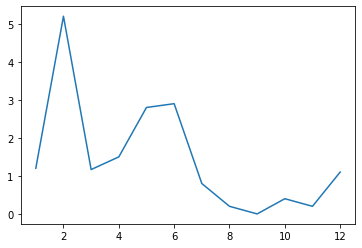

In [17]:
plt.plot(np.arange(1,13,1),[1.2, 5.2, 1.167, 1.5,2.8, 2.9,0.8,0.2,0,0.4,0.2,1.1])

In [18]:
np.mean([1.2, 5.2, 1.167, 1.5,2.8, 2.9,0.8,0.2,0,0.4,0.2,1.1])

1.4555833333333332

## Mean Variation method

In [19]:
# calculate number of B_above & B_below:

maglatExtr = argrelextrema(np.array(B[6]), np.greater_equal)
num = []
i_now = 0
for i,magval in enumerate(maglatExtr[0]):
    if abs(magval - i_now) > 1000:
        num.append(magval)
        i_now = magval
    else:
        continue

n_pass = len(num)

# Anzahl der rel. Extrema plus der erste Wert (index 0) --> +1
num_below = int(np.floor((len(num)+1)/2))
num_above = int(num_below +1)

# --> take vector 'num' as passages to to find changepoints in mean with matlab function findchangepts

In [20]:
print(num)
#np.savetxt('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/%s/num.out'%answer_Orbit[0:7], num, delimiter=',')

[18109, 36340, 53834, 72073, 89558, 107804, 125573, 143535, 161293, 178978, 197020, 214712, 232737, 250433]


In [22]:
# changepoints by variation in mean (matlab):

iptload = open('C:/Users/michi/Documents/GitHub/Jupiters_energetic_particles/%s/ipt.txt'%answer_Orbit[0:7],'r')
ipt = []
for line in iptload:
    line = line.strip()
    columns = line.split()
    for j in columns[0:]:
        ipt.append(float(j))
for i,val in enumerate(ipt):
    ipt[i] = int(val)

ipt_lo = [val for i,val in enumerate(ipt[0:len(ipt):2])]
ipt_hi = [val for i,val in enumerate(ipt[1:len(ipt):2])]

## Determine B_inside/B_above/B_below

In [23]:
# select percentage(s) by which current sheet thickness will be reduced on each side of the drop:

perc = [0,5,10,20] #in percent
n_perc = len(perc)

In [24]:
# get all 'inside-indices':

Bins_perc_temp = [[[]]*n_pass]*n_perc
Bins_perc_temp_edgeabo = [[[]]*n_pass]*n_perc
Bins_perc_temp_edgebel = [[[]]*n_pass]*n_perc
Bin = [[]]*n_pass
Bins_perc = [] # percentage-Variationen x current-sheet Durchgänge
Bins_perc_edgeabo = []# transition zone from above and inside the current sheet
Bins_perc_edgebel = [] # transition zone from below and inside the current sheet

#mean Variation:
for i in range(0,len(ipt_lo),1):
    Bin[i] = [k for k in range(ipt_lo[i],ipt_hi[i]+1,1)]
    
#convolution:
#for i,val in enumerate(passage_inds):
#    Bin[i] = [k for k in range(val[-1],val[-2]+1,1)]

for j,percentage in enumerate(Bins_perc_temp):
    for i,crossing in enumerate(percentage):
        perc_val = round(len(Bin[i])*(perc[j]/100))
        Bins_perc_temp[j][i] = (Bin[i][perc_val:len(Bin[i])-perc_val])
        if i%2 == 0:
            Bins_perc_temp_edgeabo[j][i] = Bin[i][0:perc_val]
            Bins_perc_temp_edgebel[j][i] = Bin[i][len(Bin[i])-perc_val:len(Bin[i])]
        if i%2 != 0:
            Bins_perc_temp_edgebel[j][i] = Bin[i][0:perc_val]
            Bins_perc_temp_edgeabo[j][i] = Bin[i][len(Bin[i])-perc_val:len(Bin[i])]
        Bins_perc.append(Bins_perc_temp[j][i])
        Bins_perc_edgebel.append(Bins_perc_temp_edgebel[j][i])
        Bins_perc_edgeabo.append(Bins_perc_temp_edgeabo[j][i])
Bins_perc = np.reshape(Bins_perc,(n_perc,n_pass))
Bins_perc_edgeabo = np.reshape(Bins_perc_edgeabo,(n_perc,n_pass))
Bins_perc_edgebel = np.reshape(Bins_perc_edgebel,(n_perc,n_pass))

B_inside = []
for arr in Bins_perc:
    B_inside.append(np.concatenate(arr, axis=None))
    
B_edgeabo = []
for arr in Bins_perc_edgeabo:
    B_edgeabo.append(np.concatenate(arr, axis=None))
    
B_edgebel = []
for arr in Bins_perc_edgebel:
    B_edgebel.append(np.concatenate(arr, axis=None))
    
B_edge = []
for i in range(0,n_perc,1):
    B_edge.append(np.sort(list(B_edgeabo[i]) + list(B_edgebel[i])))

In [25]:
# calculate indices of above and below current sheet for all percentage variations and current sheet crossings 
# and concatenate to B_above & B_below:

#Above:

B_abs_temp = []
B_abs = [[[]]*(num_above-2) for i in range(n_perc)]
B_abs1 = [[]]*n_perc
B_abs2 = [[]]*n_perc
B_above = [[]]*n_perc

# calculate before 1st and after last crossing:
for i,val in enumerate(perc):
    B_abs1[i] = [k for k in range(0,Bins_perc[i][0][0],1)]
    B_abs2[i] = [k for k in range(Bins_perc[i][len(num)-1][-1]+1,len(B[-1]),1)]

# calculate above-indices between all other crossings:    
for i,val in enumerate(perc):    
    for j,arr in enumerate(B_abs[i]):
        for k in range(Bins_perc[i][j*2+1][-1]+1,Bins_perc[i][j*2+2][0],1):
            B_abs_temp.append(k)
        B_abs[i][j] = B_abs_temp
        B_abs_temp = []

#concatenate to 1 vector
#all indices above current sheet for i = percentage variations
for i,val in enumerate(perc):    
    B_above[i] = B_abs1[i] + list(np.concatenate(B_abs[i])) + B_abs2[i] 
    
    
#Below:

B_bes_temp = []
B_bes = [[[]]*(num_below) for i in range(n_perc)]
B_below = [[]]*n_perc

# calculate below-indices inbetween all crossings:    
for i,val in enumerate(perc):    
    for j,arr in enumerate(B_bes[i]):
        for k in range(Bins_perc[i][j*2][-1]+1,Bins_perc[i][j*2+1][0],1):
            B_bes_temp.append(k)
        B_bes[i][j] = B_bes_temp
        B_bes_temp = []

#concatenate to 1 vector
for i,val in enumerate(perc):
    B_below[i] = list(np.concatenate(B_bes[i]))

#concatenate regions to 1 vector
Bclass = [B_inside, B_above, B_below, B_edgeabo, B_edgebel, B_edge]
Nclass = len(Bclass)

In [26]:
N_in = [[]]*n_perc
N_ab = [[]]*n_perc
N_be = [[]]*n_perc
N_edgeabo = [[]]*n_perc
N_edgebel = [[]]*n_perc
N_edge = [[]]*n_perc

for i in range(n_perc):
    N_in[i] = len(B_inside[i])
    N_ab[i] = len(B_above[i])
    N_be[i] = len(B_below[i])
    N_edgeabo[i] = len(B_edgeabo[i])
    N_edgebel[i] = len(B_edgebel[i])
    N_edge[i] = len(B_edge[i])

print('B_inside: ',round(N_in[0]/len(B[8]),4)*100,'%')
print('B_above: ',round(N_ab[0]/len(B[8]),4)*100,'%')
print('B_below: ',round(N_be[0]/len(B[8]),4)*100,'%')
print('B_edge_abo: ',round(N_edgeabo[3]/len(B[8]),4)*100,'%')
print('B_edge_bel: ',round(N_edgebel[3]/len(B[8]),4)*100,'%')

B_inside:  12.72 %
B_above:  36.78 %
B_below:  50.5 %
B_edge_abo:  2.54 %
B_edge_bel:  2.54 %


# Calculation of Intensity average for inside, above/below (Quasi-Interpolation)

In [28]:
# get time vector in intensity matrix

time_vec = open('C:/Users/michi/Documents/GitHub/Jupiters_energetic_particles/%s.d2s'%fileIntPA_O, 'r')

for line in range(17):
    line = time_vec.readline()
    
# split columns, float-values, units
time_Int=[]
for line in time_vec:
    line = line.strip()
    columns = line.split()
    for i in columns[0:1]:
        time_Int.append(i)
time_vec.close()

In [29]:
# separate time vector in days, hours, minutes, seconds and find time in B-field vector closest 
# to each time of Intensity matrix

date_Int = [dt.datetime(int(i[4:8]),int(i[9:11]),int(i[12:14])) for i in time_Int]
day_Int = [int(i.strftime("%j")) for i in date_Int]
hourInt = [int(i[15:17]) for i in time_Int]
minInt = [int(i[18:20]) for i in time_Int]
secInt = [int(i[21:23]) for i in time_Int]
min_sec_vec_Int = np.transpose([minInt,secInt])
min_sec_Int = [float(f'{i[0]}.{i[1]}') for i in min_sec_vec_Int]
Int_time = np.transpose([day_Int,hourInt,min_sec_Int])

In [30]:
# allocate closest times of both arrays by hours, minutes and seconds
# the array 'seconds_allocate_Int_B' gives list of B-field-time Indices that are closest to each intensity-time value

seconds_allocate_Int_B = []
index = 0
for time in Int_time:
    index +=1
    print('{} %'.format(index/20),end='\r')
    dates = []
    dates.append([lines for lines,val in enumerate(B[1]) if val == time[0]])
    hours = []
    hours.append([lines for lines,val in enumerate(B[2][dates[0][0]:dates[0][-1]]) if val == time[1]])
    hours[0] = [x+dates[0][0] for x in hours[0]]
    seconds_allocate_Int_B.append(min(range(len(min_sec_B[hours[0][0]:hours[0][-1]])), 
                                      key=lambda i:abs(min_sec_B[hours[0][0]:hours[0][-1]][i]-time[2])))
    seconds_allocate_Int_B[-1] = seconds_allocate_Int_B[-1] + hours[0][0]

## Allocate B-field

#### Erklärung der Datenstruktur:
die Listen sind auf folgender Weise verschachtelt:<br>
Liste<font color=blue>[Region]</font><font color=red>[Verschiebungs-Prozentsatz für Ränder]</font><font color=orange>[Species]</font><font color=green>[EnergieKanal/PitchWinkel]</font><font color=black>[Vektor]</font><br>
Die Nummerierung ist:<br>
> -  <font color=blue>Region</font>: 0 = inside, 1 = above, 2 = below, 3 = Randregion_{above}, 4 = Randregion_{below}, 5 = Randregion_{gesamt}<br>
> -  <font color=red>[Verschiebungs-Prozentsatz für Ränder]</font>: Prozentsatz, um den die Zeit innerhalb der current sheet an beiden Rändern jeweils gekürzt wurde um die Randregionen genauer zu betrachten. Die Randregionen sind also 2*Prozentsatz*currentsheet_crossingtime breit<br>
> -  <font color=orange>[Species]</font>: 0 = Oxygen, 1 = Sulphur, 2 = Helium, 3 = Protons<br>
> -  <font color=green>[EnergieKanal/PitchWinkel]</font>: Energie je nach Species: Oxygen(0-5), Sulphur(0-4), Helium(0-2), Protons depending on dataset. PitchWinkel: 0-29<br>


In [31]:
# Get matrix of intensity indices that belong to the times where the spacecraft is inside/above/below the current sheet:

Int = [[[]]*n_perc]*Nclass

Int_class = [[]]*n_perc
Int_temp = []
for clas,Bclassif in enumerate(Bclass):
    print(clas)
    for ind,p in enumerate(Bclassif):
        index1 = 0
        for valB in p:
            index1 +=1
            print('{:1%}'.format(index1/N_in[ind]),end ='\r')
            for pos,val in enumerate(seconds_allocate_Int_B):
                if valB == val:
                    Int_temp.append(pos)
        Int_class[ind] = Int_temp
        Int_temp = []
    Int[clas] = Int_class
    Int_class = [[]]*n_perc

0
100.000000%
215.360952%
395.139459%
43.331624%
53.331624%


In [620]:
Int_E = [[[[]]*n_spec for i in range(n_perc)] for i in range(Nclass)]
Int_PA = [[[[]]*n_spec for i in range(n_perc)] for i in range(Nclass)]

x_E = [[[]]*n_spec for i in range(n_perc)]
x_PA = [[[]]*n_spec for i in range(n_perc)]
x_E_temp = []
x_PA_temp = []

for clas,classif in enumerate(Int_E):
    for percind,percArr in enumerate(classif):
        for spec,specArr in enumerate(percArr):
            for j in Int[clas][percind]:
                x_E_temp.append(I_E[spec][1][j])
                x_PA_temp.append(I_PA[spec][1][j])
            x_E[percind][spec] = x_E_temp
            x_PA[percind][spec] = x_PA_temp
            x_E_temp = []
            x_PA_temp = []
    Int_E[clas] = x_E
    Int_PA[clas] = x_PA
    x_E = [[[]]*n_spec for i in range(n_perc)]
    x_PA = [[[]]*n_spec for i in range(n_perc)]

In [621]:
# transpose to delete fillValues:
for clas,classif in enumerate(Int_E):
    for p,percarr in enumerate(classif):
        for i,val in enumerate(percarr):
            Int_E[clas][p][i] = np.transpose(Int_E[clas][p][i])
            Int_PA[clas][p][i] = np.transpose(Int_PA[clas][p][i])

In [622]:
# delete fillValues
Int_E_nofill = [[[[]]*n_spec for i in range(n_perc)] for i in range(Nclass)]
Int_PA_nofill = [[[[]]*n_spec for i in range(n_perc)] for i in range(Nclass)]

x_E = [[[]]*n_spec for i in range(n_perc)]
x_PA = [[[]]*n_spec for i in range(n_perc)]
x_E_temp = []
x_PA_temp = []

for clas,classif in enumerate(Int_E):
    for percind,percArr in enumerate(classif):
        for spec,specArr in enumerate(percArr):
            for Eval in specArr:
                x_E_temp.append([x for x in Eval if x != -1.0E38])
            x_E[percind][spec] = x_E_temp
            x_E_temp = []
    Int_E_nofill[clas] = x_E
    x_E = [[[]]*n_spec for i in range(n_perc)]


for clas,classif in enumerate(Int_PA):
    for percind,percArr in enumerate(classif):
        for spec,specArr in enumerate(percArr):
            for PAval in specArr:
                x_PA_temp.append([x for x in PAval if x != -1.0E38])
            x_PA[percind][spec] = x_PA_temp
            x_PA_temp = []
    Int_PA_nofill[clas] = x_PA
    x_PA = [[[]]*n_spec for i in range(n_perc)]

In [623]:
# take average

Int_E_mean = [[[[]]*n_spec for i in range(n_perc)] for i in range(Nclass)]
Int_PA_mean = [[[[]]*n_spec for i in range(n_perc)] for i in range(Nclass)]

x_E = [[[]]*n_spec for i in range(n_perc)]
x_PA = [[[]]*n_spec for i in range(n_perc)]
x_E_temp = []
x_PA_temp = []

for clas,classif in enumerate(Int_E_nofill):
    for percind,percArr in enumerate(classif):
        for spec,val in enumerate(percArr):
            x_E_temp.append([np.mean(x) for x in val])
        x_E[percind] = x_E_temp
        x_E_temp = []
    Int_E_mean[clas] = x_E
    x_E = [[[]]*n_spec for i in range(n_perc)]
    
for clas,classif in enumerate(Int_PA_nofill):
    for percind,percArr in enumerate(classif):
        for spec,val in enumerate(percArr):
            x_PA_temp.append([np.mean(x) for x in val])
        x_PA[percind] = x_PA_temp
        x_PA_temp = []
    Int_PA_mean[clas] = x_PA
    x_PA = [[[]]*n_spec for i in range(n_perc)]

/home/mschoef2/Conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/mschoef2/Conda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [624]:
I_E_mean = []
for i in range(4):
    #print(i)
    I_E_mean.append(np.mean(I_E[i][0]))
I_E_mean

[2443.215833333333, 2860.4610000000002, 398.06166666666667, 246.00142857142856]

In [625]:
#distribution function

#number density
n_cbm = np.array(n)*1E6 #1/m^3

#phase-space density
# müsste intergriert n ergeben, aber nur bei integration über gesamte verteilungsfunktion. 
#Hier wird nicht die gesamte Verteilungsfunktion über E observed
f_E = [[[[]]*n_spec for i in range(n_perc)] for i in range(Nclass)] # in s^3/m^6
f_PA = [[[[]]*n_spec for i in range(n_perc)] for i in range(Nclass)] # in s^3/m^6

x_E = [[[]]*n_spec for i in range(n_perc)]
x_PA = [[[]]*n_spec for i in range(n_perc)]
x_E_temp = []
x_PA_temp = []

for clas,classif in enumerate(Int_E_mean):
    for percind,percArr in enumerate(classif):
        for spec,val in enumerate(percArr):
            if val == []:
                break
            else:
                x_E_temp.append(np.divide(np.array(val)*10000/(1.6*(10**(-19))*1000)*(m[spec]**2),
                                      2*I_E[spec][0]*1.6*(10**(-19))*1000))
        x_E[percind] = x_E_temp
        x_E_temp = []
    f_E[clas] = x_E
    x_E = [[[]]*n_spec for i in range(n_perc)]
    
    
for clas,classif in enumerate(Int_PA_mean):
    for percind,percArr in enumerate(classif):
        for spec,val in enumerate(percArr):
            if val == []:
                break
            else:
                x_PA_temp.append(np.divide(np.array(val)*10000/(1.6*(10**(-19))*1000)*(m[spec]**2),
                                      2*I_E_mean[spec]*1.6*(10**(-19))*1000))
        x_PA[percind] = x_PA_temp
        x_PA_temp = []
    f_PA[clas] = x_PA
    x_PA = [[[]]*n_spec for i in range(n_perc)]

In [626]:
for region in range(3):
    for species in range(4):
        np.savetxt('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/f_E/f_E%s_%s_0_%s.txt'%(answer_Orbit[5:7],region,species),f_E[region][0][species], delimiter = ',')

In [627]:
for species in range(4):
    np.savetxt('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/f_E/n%s_%s.txt'%(answer_Orbit[5:7],species),n_cbm[species], delimiter = ',')
    np.savetxt('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/f_E/I_E%s_%s_0.txt'%(answer_Orbit[5:7],species),I_E[species][0], delimiter = ',')

## PA-Count for S/N

In [628]:
# load in counts for PA

yTag_PA_counts = 13

fileIntPA_O_counts = '%sPA_O_counts'%answer_Orbit
fileIntPA_S_counts = '%sPA_S_counts'%answer_Orbit
fileIntPA_He_counts = '%sPA_He_counts'%answer_Orbit
fileIntPA_H_counts = '%sPA_%s_H_counts'%(answer_Orbit, answer_Proton)

files_PA_counts = [[fileIntPA_O_counts, yTag_PA_counts, yTag_to_intens], [fileIntPA_S_counts, yTag_PA_counts, yTag_to_intens],
           [fileIntPA_He_counts, yTag_PA_counts, yTag_to_intens], [fileIntPA_H_counts, yTag_PA_counts, yTag_to_intens]]

counts_PA = [0,0,0,0]

for i,species in enumerate(files_PA_counts):
    counts_PA[i] = [load_yTag_data(species[0],species[1],species[2])][0]

In [629]:
PA_counts = [[[[]]*n_spec for i in range(n_perc)] for i in range(Nclass)]

x_PA = [[[]]*n_spec for i in range(n_perc)]
x_PA_temp = []
    
for clas,classif in enumerate(PA_counts):
    for percind,percArr in enumerate(classif):
        for spec,specArr in enumerate(percArr):
            for j in Int[clas][percind]:
                x_PA_temp.append(counts_PA[spec][1][j])
            x_PA[percind][spec] = x_PA_temp
            x_PA_temp = []
    PA_counts[clas] = x_PA
    x_PA = [[[]]*n_spec for i in range(n_perc)]

In [630]:
for clas,classif in enumerate(PA_counts):
    for p,percArr in enumerate(classif):
        for i,val in enumerate(percArr):
            PA_counts[clas][p][i] = np.transpose(PA_counts[clas][p][i])

In [631]:
PA_nofill_counts = [[[[]]*n_spec for i in range(n_perc)] for i in range(Nclass)]

x_PA = [[[]]*n_spec for i in range(n_perc)]
x_PA_temp = []
    
for clas,classif in enumerate(PA_counts):
    for percind,percArr in enumerate(classif):
        for spec,specArr in enumerate(percArr):
            for PAval in specArr:
                x_PA_temp.append([x for x in PAval if x != -1.0E38])
            x_PA[percind][spec] = x_PA_temp
            x_PA_temp = []
    PA_nofill_counts[clas] = x_PA
    x_PA = [[[]]*n_spec for i in range(n_perc)]

## standard deviation = $\sqrt(\sum(counts))$ & 
## variance = $\sum(counts)$ (Poisson statistic)

In [632]:
PA_sum_counts = [[[[]]*n_spec for i in range(n_perc)] for i in range(Nclass)]

x_PA = [[[]]*n_spec for i in range(n_perc)]
x_PA_temp = []
    
for clas,classif in enumerate(PA_nofill_counts):
    for percind,percArr in enumerate(classif):
        for spec,val in enumerate(percArr):
            x_PA_temp.append([np.sum(x) for x in val])
        x_PA[percind] = x_PA_temp
        x_PA_temp = []
    PA_sum_counts[clas] = x_PA
    x_PA = [[[]]*n_spec for i in range(n_perc)]

In [633]:
PA_sqrt_counts = [[[[]]*n_spec for i in range(n_perc)] for i in range(Nclass)]

x_PA = [[[]]*n_spec for i in range(n_perc)]
x_PA_temp = []
    
for clas,classif in enumerate(PA_sum_counts):
    for percind,percArr in enumerate(classif):
        for spec,val in enumerate(percArr):
            x_PA_temp.append([np.sqrt(x) for x in val])
        x_PA[percind] = x_PA_temp
        x_PA_temp = []
    PA_sqrt_counts[clas] = x_PA
    x_PA = [[[]]*n_spec for i in range(n_perc)]

## Rose criterion

In [634]:
PA_vec = np.arange(3,180,6)
Int_PA_mean_gr5 = [[[[]]*n_spec for i in range(n_perc)] for i in range(Nclass)]
I_PA_gr5 = [[[[]]*n_spec for i in range(n_perc)] for i in range(Nclass)]

x_PA = [[[]]*n_spec for i in range(n_perc)]
i_PA = [[[]]*n_spec for i in range(n_perc)]
x_PA_temp = []
i_PA_temp = []
    
for clas,classif in enumerate(PA_sqrt_counts):
    for percind,percArr in enumerate(classif):
        for spec,specArr in enumerate(percArr):
            for i,PAval in enumerate(specArr):
                if PAval >= 5:
                    x_PA_temp.append(Int_PA_mean[clas][percind][spec][i])
                    i_PA_temp.append(PA_vec[i])
            x_PA[percind][spec] = x_PA_temp
            i_PA[percind][spec] = i_PA_temp
            x_PA_temp = []
            i_PA_temp = []
    Int_PA_mean_gr5[clas] = x_PA
    I_PA_gr5[clas] = i_PA
    x_PA = [[[]]*n_spec for i in range(n_perc)]
    i_PA = [[[]]*n_spec for i in range(n_perc)]

# Save variables

In [635]:
# save Intensity (energy):
regions = [0,1,2]

for region in regions:
    for species in range(4):
        np.savetxt('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit%s/save/Int_E_mean%s_%s_0_%s.txt'%
                   (answer_Orbit[5:7],answer_Orbit[5:7],region,species),Int_E_mean[region][0][species], delimiter = ',')
for species in range(4):
    np.savetxt('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit%s/save/Int_E_mean%s_5_3_%s.txt'%
               (answer_Orbit[5:7],answer_Orbit[5:7],species),Int_E_mean[5][3][species], delimiter = ',')        

In [636]:
# save Intensity (PA):

for region in regions:
    for species in range(4):
        np.savetxt('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit%s/save/Int_PA_mean_gr5_%s_%s_0_%s.txt'%
                   (answer_Orbit[5:7],answer_Orbit[5:7],region,species),Int_PA_mean_gr5[region][0][species], delimiter = ',')
        np.savetxt('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit%s/save/I_PA_gr5_%s_%s_0_%s.txt'%
                   (answer_Orbit[5:7],answer_Orbit[5:7],region,species),I_PA_gr5[region][0][species], delimiter = ',')
        
regions_edge = [3,4,5]
for region in regions_edge:
    for species in range(4):
        np.savetxt('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit%s/save/Int_PA_mean_gr5_%s_%s_3_%s.txt'%
                   (answer_Orbit[5:7],answer_Orbit[5:7],region,species),Int_PA_mean_gr5[region][3][species], delimiter = ',')
        np.savetxt('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit%s/save/I_PA_gr5_%s_%s_3_%s.txt'%
                   (answer_Orbit[5:7],answer_Orbit[5:7],region,species),I_PA_gr5[region][3][species], delimiter = ',')

# Einlesen aller Orbits & Plotten

In [2]:
n_orb = 12
n_spec = 3
regions = [0,1,2]
regions_edge = [3,4,5]

# Einladen Intensity (E)
Int_E_mean_orb = [[[[]]*n_spec for i in range(3)] for i in range(n_orb)]
Int_temp = [[[]]*n_spec for i in range(3)]
temp = []

for orb in range(n_orb):
    for region in regions:
        for species in range(n_spec):
            if orb <= 8:
                load = open('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit0%s/save/Int_E_mean0%s_%s_0_%s.txt'%
                            (orb+1,orb+1,region,species),'r')
            else:
                load = open('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit%s/save/Int_E_mean%s_%s_0_%s.txt'%
                            (orb+1,orb+1,region,species),'r')
            for line in load:
                temp.append(float(line))
            Int_temp[region][species] = temp
            temp = []
    Int_E_mean_orb[orb] = Int_temp
    Int_temp = [[[]]*n_spec for i in range(3)]
    
    
Int_E_mean_perc_orb = [[[]]*n_spec for i in range(n_orb)]
Int_temp = [[]]*n_spec
temp2 = []

for orb in range (n_orb):
    for species in range(n_spec):
        if orb <= 8:
            load = open('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit0%s/save/Int_E_mean0%s_5_3_%s.txt'%
                            (orb+1,orb+1,species),'r')
        else:
            load = open('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit%s/save/Int_E_mean%s_5_3_%s.txt'%
                            (orb+1,orb+1,species),'r')
        for line in load:
            temp2.append(float(line))
        Int_temp[species] = temp2
        temp2 = []
    Int_E_mean_perc_orb[orb] = Int_temp
    Int_temp = [[]]*n_spec

In [3]:
# Einladen Intensity (PA)

Int_PA_mean_gr5_orb = [[[[]]*n_spec for i in range(3)] for i in range(n_orb)]
I_PA_gr5_orb = [[[[]]*n_spec for i in range(3)] for i in range(n_orb)]
Int_temp = [[[]]*n_spec for i in range(3)]
I_temp = [[[]]*n_spec for i in range(3)]
temp_Int = []
temp_I = []

for orb in range(n_orb):
    for region in regions:
        for species in range(n_spec):
            if orb <= 8:
                load_Int = open('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit0%s/save/Int_PA_mean_gr5_0%s_%s_0_%s.txt'%
                            (orb+1,orb+1,region,species),'r')
                load_I = open('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit0%s/save/I_PA_gr5_0%s_%s_0_%s.txt'%
                            (orb+1,orb+1,region,species),'r')
            else:
                load_Int = open('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit%s/save/Int_PA_mean_gr5_%s_%s_0_%s.txt'%
                            (orb+1,orb+1,region,species),'r')
                load_I = open('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit%s/save/I_PA_gr5_%s_%s_0_%s.txt'%
                            (orb+1,orb+1,region,species),'r')
            for line in load_Int:
                temp_Int.append(float(line))
            for line in load_I:
                temp_I.append(float(line))    
            Int_temp[region][species] = temp_Int
            temp_Int = []
            I_temp[region][species] = temp_I
            temp_I = []
    Int_PA_mean_gr5_orb[orb] = Int_temp
    Int_temp = [[[]]*n_spec for i in range(3)]
    I_PA_gr5_orb[orb] = I_temp
    I_temp = [[[]]*n_spec for i in range(3)]
    
    
Int_PA_mean_gr5_perc_orb = [[[[]]*n_spec for i in range(3)] for i in range(n_orb)]
I_PA_gr5_perc_orb = [[[[]]*n_spec for i in range(3)] for i in range(n_orb)]
Int_temp = [[[]]*n_spec for i in range(3)]
I_temp = [[[]]*n_spec for i in range(3)]
temp_Int = []
temp_I = []


for orb in range(n_orb):
    for r,region in enumerate(regions_edge):
        for species in range(n_spec):
            if orb <= 8:
                load_Int = open('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit0%s/save/Int_PA_mean_gr5_0%s_%s_3_%s.txt'%
                            (orb+1,orb+1,region,species),'r')
                load_I = open('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit0%s/save/I_PA_gr5_0%s_%s_3_%s.txt'%
                            (orb+1,orb+1,region,species),'r')
            else:
                load_Int = open('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit%s/save/Int_PA_mean_gr5_%s_%s_3_%s.txt'%
                            (orb+1,orb+1,region,species),'r')
                load_I = open('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit%s/save/I_PA_gr5_%s_%s_3_%s.txt'%
                            (orb+1,orb+1,region,species),'r')
            for line in load_Int:
                temp_Int.append(float(line))
            for line in load_I:
                temp_I.append(float(line))    
            Int_temp[r][species] = temp_Int
            temp_Int = []
            I_temp[r][species] = temp_I
            temp_I = []
    Int_PA_mean_gr5_perc_orb[orb] = Int_temp
    Int_temp = [[[]]*n_spec for i in range(3)]
    I_PA_gr5_perc_orb[orb] = I_temp
    I_temp = [[[]]*n_spec for i in range(3)]

# Plotting all Orbits

In [4]:
plt.plot(I_PA_gr5_02[2][0], Int_PA_mean_gr5_02[2][0])

NameError: name 'plt' is not defined

In [9]:
# Energy channels:

E_O = [476.525, 746.4549999999999, 956.315, 1690.0, 3490.0, 7300.0]
E_S = [612.705, 869.6, 1750.0, 3660.0, 7410.0]
E_He = [92.17999999999999, 247.42499999999998, 854.58]
E_HiTOFxE = [33.46, 39.515, 43.175, 45.269999999999996, 47.68, 50.18, 52.795, 55.675, 58.69, 60.989999999999995, 66.78, 
             76.24, 87.025, 99.605, 114.78, 132.62, 154.075, 180.02, 210.85500000000002, 247.945, 292.57, 
             346.005, 410.68, 490.19, 589.185, 715.34, 877.56, 1119.485, 2584.9]
E_LoTOFxE = [33.46, 37.44, 54.92999999999999, 97.09, 195.655, 401.205, 902.23]
E_HiResIon = [32.175, 36.425, 38.765, 39.769999999999996, 41.945, 46.52, 52.035, 57.215, 63.38, 72.495, 83.535, 95.94, 
              110.03999999999999, 126.47500000000001, 146.245, 169.53, 197.155, 230.24, 269.11, 315.105, 
              369.92499999999995, 435.84000000000003, 516.01, 614.885, 739.64, 1039.96]
E = [E_O,E_S,E_He]
E_H = [E_LoTOFxE, E_LoTOFxE, E_HiResIon, E_HiResIon, E_HiTOFxE, 
       E_LoTOFxE, E_HiTOFxE, E_LoTOFxE, E_LoTOFxE, E_HiTOFxE, E_HiTOFxE] # starts with 2nd orbit
PA = [3.0, 9.0, 15.0, 21.0, 27.0, 33.0, 39.0, 45.0, 51.0, 57.0, 63.0, 69.0, 75.0, 81.0, 87.0, 93.0, 99.0, 105.0, 111.0, 
      117.0, 123.0, 129.0, 135.0, 141.0, 147.0, 153.0, 159.0, 165.0, 171.0, 177.0]

Text(0.5,0.06,'Energy [keV]')

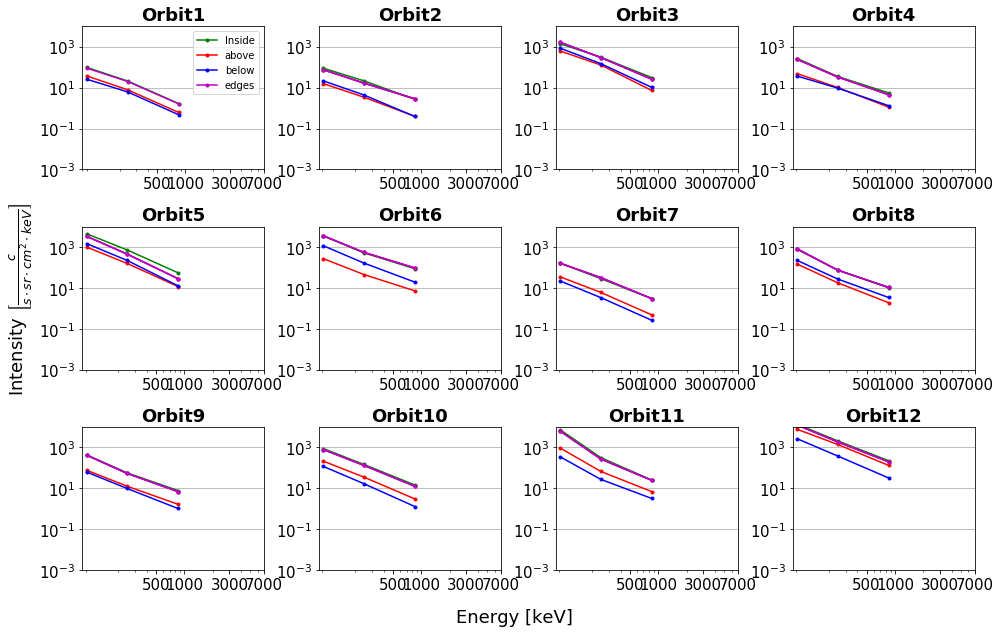

In [12]:
# Energy spectra:

fig,ax = plt.subplots(3,4, figsize = (16,10))
fig.subplots_adjust(hspace = .4, wspace=.3)
farbe = ['.-g', '.-r', '.-b']

ax = ax.ravel()

species = 2
ind = 0


for orb in range(1,n_orb,1):
    orb_1 = orb+1
    for region in regions:
        ax[orb].loglog(E[species], Int_E_mean_perc_orb[orb][species], '.-m',E[species], Int_E_mean_orb[orb][region][species], farbe[region])
        ax[orb].set_title('Orbit%s'%orb_1, fontsize = 18,fontweight="bold")
        ax[orb].tick_params(labelsize=15)
        ax[4].set_ylabel(r'Intensity $\left[ \frac{c}{s \cdot sr \cdot cm^2 \cdot keV}\right]$', fontsize = 18)
        #ax[orb].set_xticks([E[species][0],E[species][3],E[species][5]])
        #ax[orb].set_xticklabels([int(E[species][0]),int(E[species][3]),int(E[species][5])])
        ax[orb].set_xticks([500,1000,3000,7000])
        ax[orb].set_xticklabels([500,1000,3000,7000])
        ax[orb].set_ylim(0.001, 10000)
        #ax[orb].set_yticks([10**(-3),10**(-2),10**(-1),1,10,100,1000,10000])
        #ax[orb].set_yticklabels([10**(-2),1,100,10000])
        ax[orb].grid(axis = 'y', which = 'major')
#Oxygen:
#ax[0].loglog([518.99, 746.4549999999999, 1196.8, 3001.1, 6032.605, 9110.34], Int_E_mean_orb[0][0][species], '.-g', 
#             [518.99, 746.4549999999999, 1196.8, 3001.1, 6032.605, 9110.34], Int_E_mean_orb[0][1][species], '.-r',
#             [518.99, 746.4549999999999, 1196.8, 3001.1, 6032.605, 9110.34], Int_E_mean_orb[0][2][species], '.-b', 
#             [518.99, 746.4549999999999, 1196.8, 3001.1, 6032.605, 9110.34], Int_E_mean_perc_orb[0][species], '.-m')
#Sulfur:
#ax[0].loglog([665.55, 929.095, 1518.105, 3767.16, 6363.235000000001, 9482.27], Int_E_mean_orb[0][0][species], '.-g', 
#             [665.55, 929.095, 1518.105, 3767.16, 6363.235000000001, 9482.27], Int_E_mean_orb[0][1][species], '.-r',
#             [665.55, 929.095, 1518.105, 3767.16, 6363.235000000001, 9482.27], Int_E_mean_orb[0][2][species], '.-b', 
#             [665.55, 929.095, 1518.105, 3767.16, 6363.235000000001, 9482.27], Int_E_mean_perc_orb[0][species], '.-m')
#Helium:
ax[0].loglog([88.55499999999999, 243.79999999999998, 854.58], Int_E_mean_orb[0][0][species], '.-g', 
             [88.55499999999999, 243.79999999999998, 854.58], Int_E_mean_orb[0][1][species], '.-r',
             [88.55499999999999, 243.79999999999998, 854.58], Int_E_mean_orb[0][2][species], '.-b', 
             [88.55499999999999, 243.79999999999998, 854.58], Int_E_mean_perc_orb[0][species], '.-m')
ax[0].set_title('Orbit1', fontsize = 18,fontweight="bold")
ax[0].tick_params(labelsize=15)
#ax[0].set_xticks([518.99,1196.8,3001.1,9110.34])
#ax[0].set_xticklabels([int(518.99),int(1196.8),int(3001.1),int(9110.34)])
ax[0].set_xticks([500,1000,3000,7000])
#ax[0].set_xticks([100,1000,7000])
ax[0].set_xticklabels([500,1000,3000,7000])
ax[0].set_ylim(0.001, 10000)
ax[0].legend(['Inside', 'above', 'below', 'edges'])
ax[0].grid(axis = 'y', which = 'major')
fig.text(0.5, 0.06, 'Energy [keV]', ha='center', va='center', fontsize = 18)

#fig.savefig('All_Ens_He_grid.pdf',bbox_inches='tight')

NameError: name 'E_H' is not defined

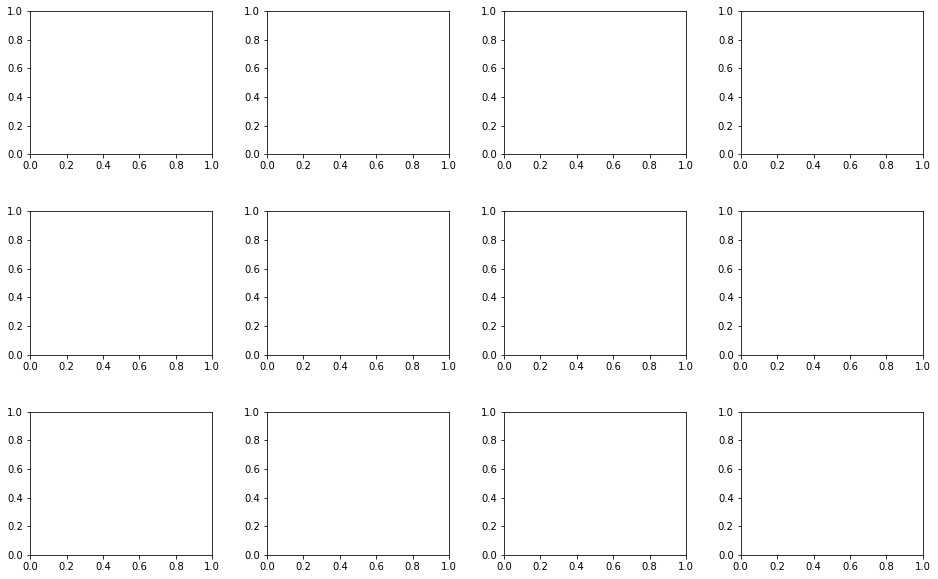

In [7]:
# Energy spectra:
# Protons

fig,ax = plt.subplots(3,4, figsize = (16,10))
fig.subplots_adjust(hspace = .4, wspace=.3)
farbe = ['.-g', '.-r', '.-b']

ax = ax.ravel()

species = 3
ind = 0

for orb in range(1,n_orb,1):
    orb_1 = orb+1
    if orb != 4:
        for region in regions:
            ax[orb].loglog(E_H[orb-1], Int_E_mean_orb[orb][region][species], farbe[region], 
                                 E_H[orb-1], Int_E_mean_perc_orb[orb][species], '.-m')
            ax[orb].set_title('Orbit%s'%orb_1, fontsize = 18,fontweight="bold")
            ax[orb].tick_params(labelsize=15)
            ax[4].set_ylabel(r'Intensity $\left[ \frac{c}{s \cdot sr \cdot cm^2 \cdot keV}\right]$', fontsize = 18)
            #ax[orb].set_xticks([E[species][0],E[species][3],E[species][5]])
            #ax[orb].set_xticklabels([int(E[species][0]),int(E[species][3]),int(E[species][5])])
            ax[orb].set_xticks([30,100,1000,7000])
            ax[orb].set_xticklabels([30,100,1000,7000])
            ax[orb].set_ylim(0.001, 10000000)
            #ax[orb].set_yticks([10**(-3),10**(-2),10**(-1),1,10,100,1000,10000])
            #ax[orb].set_yticklabels([10**(-2),1,100,10000])
            ax[orb].grid(axis = 'y', which = 'major')
ax[0].loglog([33.46, 39.515, 45.485, 48.72, 51.325, 54.614999999999995, 56.75, 60.504999999999995, 63.92, 
              68.71000000000001, 78.55, 91.66499999999999, 105.66499999999999, 120.66, 140.96, 165.14, 192.54, 
              225.42000000000002, 263.445, 308.595, 363.245, 428.29999999999995, 507.815, 606.51, 730.95, 889.215, 
              1123.63], Int_E_mean_orb[0][0][species], '.-g', 
             [33.46, 39.515, 45.485, 48.72, 51.325, 54.614999999999995, 56.75, 60.504999999999995, 63.92, 
              68.71000000000001, 78.55, 91.66499999999999, 105.66499999999999, 120.66, 140.96, 165.14, 192.54, 
              225.42000000000002, 263.445, 308.595, 363.245, 428.29999999999995, 507.815, 606.51, 730.95, 889.215, 
              1123.63], Int_E_mean_orb[0][1][species], '.-r',
             [33.46, 39.515, 45.485, 48.72, 51.325, 54.614999999999995, 56.75, 60.504999999999995, 63.92, 
              68.71000000000001, 78.55, 91.66499999999999, 105.66499999999999, 120.66, 140.96, 165.14, 192.54, 
              225.42000000000002, 263.445, 308.595, 363.245, 428.29999999999995, 507.815, 606.51, 730.95, 889.215, 
              1123.63], Int_E_mean_orb[0][2][species], '.-b', 
             [33.46, 39.515, 45.485, 48.72, 51.325, 54.614999999999995, 56.75, 60.504999999999995, 63.92, 
              68.71000000000001, 78.55, 91.66499999999999, 105.66499999999999, 120.66, 140.96, 165.14, 192.54, 
              225.42000000000002, 263.445, 308.595, 363.245, 428.29999999999995, 507.815, 606.51, 730.95, 889.215, 
              1123.63], Int_E_mean_perc_orb[0][species], '.-m')
ax[0].set_title('Orbit1', fontsize = 18,fontweight="bold")
ax[0].tick_params(labelsize=15)
#ax[0].set_xticks([518.99,1196.8,3001.1,9110.34])
#ax[0].set_xticklabels([int(518.99),int(1196.8),int(3001.1),int(9110.34)])
ax[0].set_xticks([30,100,1000,7000])
ax[0].set_xticklabels([30,100,1000,7000])
ax[0].set_ylim(0.001, 10000000)
ax[0].legend(['Inside', 'above', 'below', 'edges'])
ax[0].grid(axis = 'y', which = 'major')



ax[4].loglog([31.275, 32.995000000000005, 34.14, 37.07, 41.775000000000006, 51.675, 63.355000000000004, 72.495, 83.47, 
              95.875, 110.03999999999999, 126.47500000000001, 146.245, 169.53, 197.155, 230.24, 269.11, 315.105, 
              369.92499999999995, 435.84000000000003, 516.01, 614.885, 
              739.64, 1039.96], Int_E_mean_orb[4][0][species], '.-g',
             [31.275, 32.995000000000005, 34.14, 37.07, 41.775000000000006, 51.675, 63.355000000000004, 72.495, 83.47, 
              95.875, 110.03999999999999, 126.47500000000001, 146.245, 169.53, 197.155, 230.24, 269.11, 315.105, 
              369.92499999999995, 435.84000000000003, 516.01, 614.885, 
              739.64, 1039.96], Int_E_mean_orb[4][1][species], '.-r',
             [31.275, 32.995000000000005, 34.14, 37.07, 41.775000000000006, 51.675, 63.355000000000004, 72.495, 83.47, 
              95.875, 110.03999999999999, 126.47500000000001, 146.245, 169.53, 197.155, 230.24, 269.11, 315.105, 
              369.92499999999995, 435.84000000000003, 516.01, 614.885, 
              739.64, 1039.96], Int_E_mean_orb[4][2][species], '.-b', 
             [31.275, 32.995000000000005, 34.14, 37.07, 41.775000000000006, 51.675, 63.355000000000004, 72.495, 83.47, 
              95.875, 110.03999999999999, 126.47500000000001, 146.245, 169.53, 197.155, 230.24, 269.11, 315.105, 
              369.92499999999995, 435.84000000000003, 516.01, 614.885, 
              739.64, 1039.96], Int_E_mean_perc_orb[4][species], '.-m')
ax[4].set_title('Orbit5', fontsize = 18,fontweight="bold")
ax[4].tick_params(labelsize=15)
#ax[4].set_xticks([518.99,1196.8,3001.1,9110.34])
#ax[4].set_xticklabels([int(518.99),int(1196.8),int(3001.1),int(9110.34)])
ax[4].set_xticks([30,100,1000,7000])
ax[4].set_xticklabels([30,100,1000,7000])
ax[4].set_ylim(0.001, 10000000)
ax[4].grid(axis = 'y', which = 'major')


fig.text(0.5, 0.06, 'Energy [keV]', ha='center', va='center', fontsize = 18)

#fig.savefig('All_Ens_H_grid.pdf',bbox_inches='tight')

Text(0.5,0.07,'PA [°]')

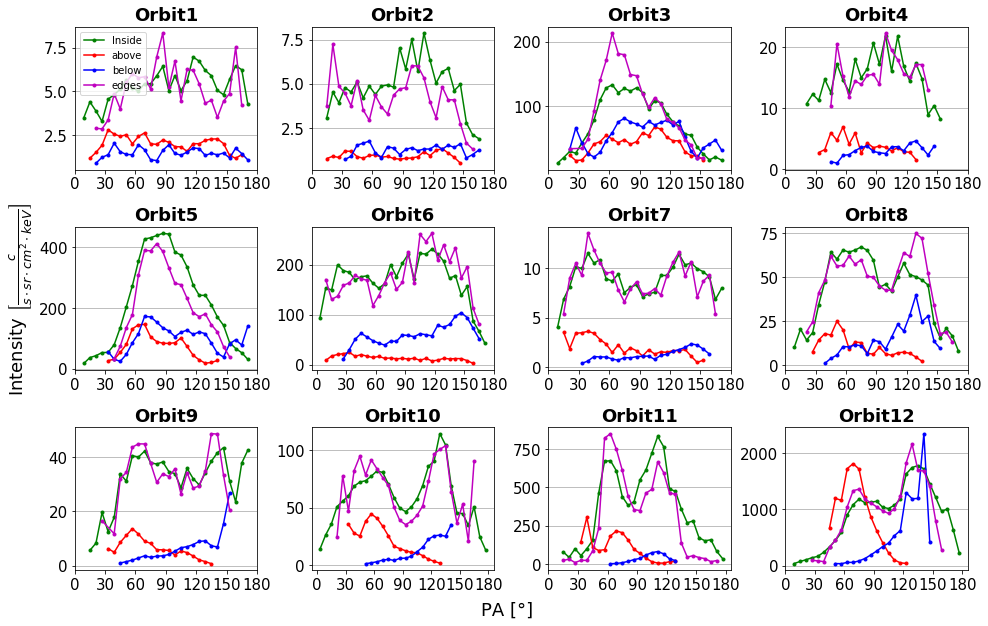

In [14]:
# PA spectra

fig,ax = plt.subplots(3,4, figsize = (16,10))
fig.subplots_adjust(hspace = .4, wspace=.3)
farbe = ['.-g', '.-r', '.-b']
reg = ['inside', 'above', 'below']
ax = ax.ravel()

species = 2
ind = 0

for orb in range(n_orb):
    orb_1 = orb+1
    for region in regions:
        ax[orb].plot(I_PA_gr5_orb[orb][region][species], Int_PA_mean_gr5_orb[orb][region][species], farbe[region])
    ax[orb].plot(I_PA_gr5_perc_orb[orb][2][species], Int_PA_mean_gr5_perc_orb[orb][2][species], '.-m')    
    ax[orb].set_title('Orbit%s'%orb_1, fontsize = 18, fontweight="bold")
    ax[orb].tick_params(labelsize=15)
    ax[4].set_ylabel(r'Intensity $\left[ \frac{c}{s \cdot sr \cdot cm^2 \cdot keV}\right]$', fontsize = 18)
    #ax[orb].grid(axis = 'y', which = 'major')
    ax[orb].grid(axis = 'x', which = 'major')
    ax[orb].grid()
    ax[orb].set_xticks([0,30,60,90,120,150,180])
    ax[orb].set_xticklabels([0,30,60,90,120,150,180])
    

ax[0].legend(['Inside', 'above', 'below', 'edges'])
fig.text(0.5, 0.07, 'PA [°]', ha='center', va='center', fontsize = 18)

#fig.savefig('All_PAs_O.pdf',bbox_inches='tight')

Text(0.5,0.07,'PA [°]')

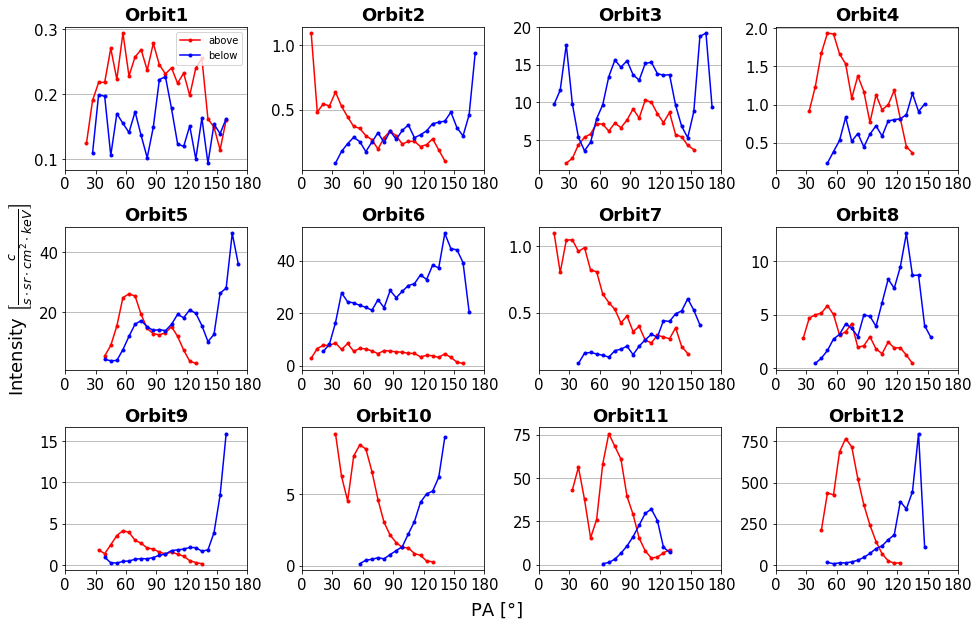

In [58]:
fig,ax = plt.subplots(3,4, figsize = (16,10))
fig.subplots_adjust(hspace = .4, wspace=.3)
farbe = ['.-r', '.-b']
reg = ['above', 'below']
ax = ax.ravel()

species = 0
ind = 0

for orb in range(n_orb):
    orb_1 = orb+1
    for region in range(1,3):
        ax[orb].plot(I_PA_gr5_orb[orb][region][species], Int_PA_mean_gr5_orb[orb][region][species], farbe[region-1])   
    ax[orb].set_title('Orbit%s'%orb_1, fontsize = 18, fontweight="bold")
    ax[orb].tick_params(labelsize=15)
    ax[4].set_ylabel(r'Intensity $\left[ \frac{c}{s \cdot sr \cdot cm^2 \cdot keV}\right]$', fontsize = 18)
    #ax[orb].grid(axis = 'y', which = 'major')
    ax[orb].grid(axis = 'x', which = 'major')
    ax[orb].grid()
    ax[orb].set_xticks([0,30,60,90,120,150,180])
    ax[orb].set_xticklabels([0,30,60,90,120,150,180])
    

ax[0].legend(['above', 'below'])
fig.text(0.5, 0.07, 'PA [°]', ha='center', va='center', fontsize = 18)

Text(0.5,0.01,'PA [°]')

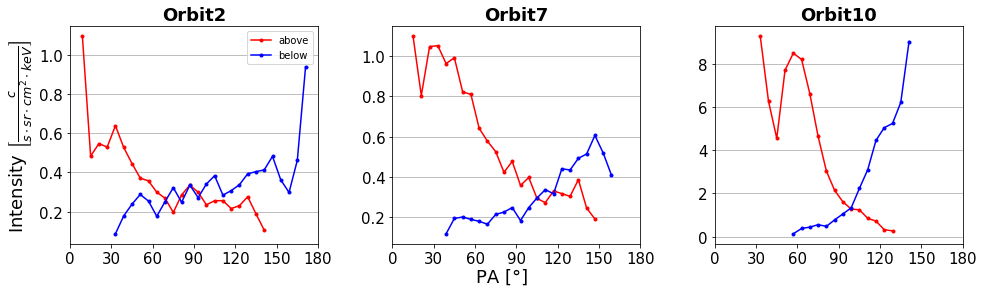

In [15]:
fig,ax = plt.subplots(1,3, figsize = (16,4))
fig.subplots_adjust(hspace = .4, wspace=.3)
farbe = ['.-r', '.-b']
reg = ['above', 'below']
ax = ax.ravel()

species = 0
ind = 0

ax[0].plot(I_PA_gr5_orb[1][1][species], Int_PA_mean_gr5_orb[1][1][species], '.-r', 
           I_PA_gr5_orb[1][2][species], Int_PA_mean_gr5_orb[1][2][species], '.-b')
  
ax[0].set_title('Orbit2', fontsize = 18, fontweight="bold")
ax[0].tick_params(labelsize=15)
ax[0].set_ylabel(r'Intensity $\left[ \frac{c}{s \cdot sr \cdot cm^2 \cdot keV}\right]$', fontsize = 18)
#ax[orb].grid(axis = 'y', which = 'major')
ax[0].grid(axis = 'x', which = 'major')
ax[0].grid()
ax[0].set_xticks([0,30,60,90,120,150,180])
ax[0].set_xticklabels([0,30,60,90,120,150,180])

ax[1].plot(I_PA_gr5_orb[6][1][species], Int_PA_mean_gr5_orb[6][1][species], '.-r', 
           I_PA_gr5_orb[6][2][species], Int_PA_mean_gr5_orb[6][2][species], '.-b')
  
ax[1].set_title('Orbit7', fontsize = 18, fontweight="bold")
ax[1].tick_params(labelsize=15)
#ax[1].set_ylabel(r'Intensity $\left[ \frac{c}{s \cdot sr \cdot cm^2 \cdot keV}\right]$', fontsize = 18)
#ax[orb].grid(axis = 'y', which = 'major')
ax[1].grid(axis = 'x', which = 'major')
ax[1].grid()
ax[1].set_xticks([0,30,60,90,120,150,180])
ax[1].set_xticklabels([0,30,60,90,120,150,180])

ax[2].plot(I_PA_gr5_orb[9][1][species], Int_PA_mean_gr5_orb[9][1][species], '.-r', 
           I_PA_gr5_orb[9][2][species], Int_PA_mean_gr5_orb[9][2][species], '.-b')

ax[2].set_title('Orbit10', fontsize = 18, fontweight="bold")
ax[2].tick_params(labelsize=15)
#ax[2].set_ylabel(r'Intensity $\left[ \frac{c}{s \cdot sr \cdot cm^2 \cdot keV}\right]$', fontsize = 18)
#ax[orb].grid(axis = 'y', which = 'major')
ax[2].grid(axis = 'x', which = 'major')
ax[2].grid()
ax[2].set_xticks([0,30,60,90,120,150,180])
ax[2].set_xticklabels([0,30,60,90,120,150,180])
    

ax[0].legend(['above', 'below'])
fig.text(0.5, 0.01, 'PA [°]', ha='center', va='center', fontsize = 18)
#fig.savefig('PAs_O_Orbit2_7_10.pdf',bbox_inches='tight')

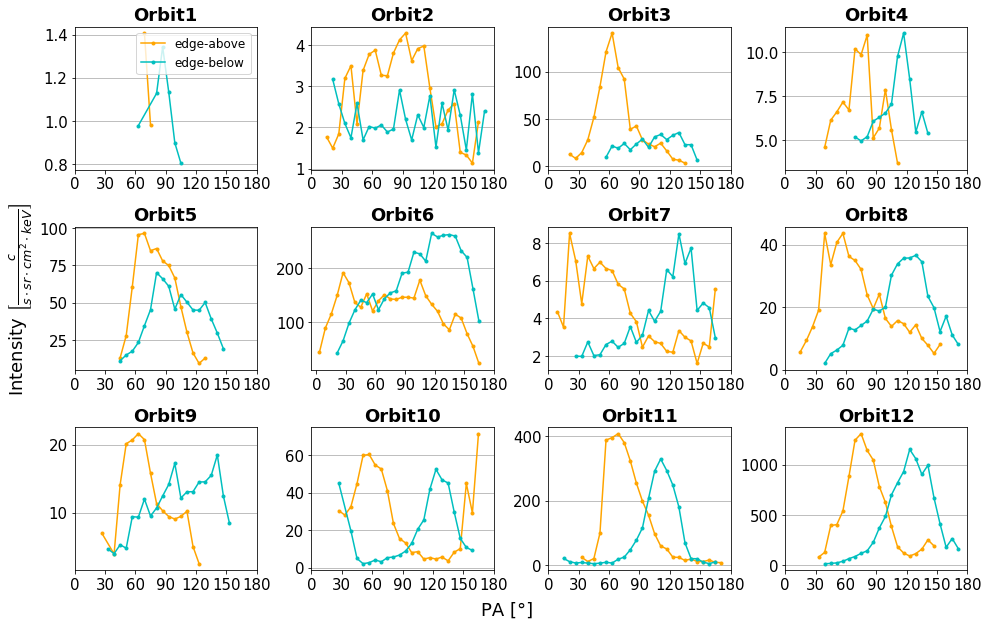

In [15]:
fig,ax = plt.subplots(3,4, figsize = (16,10))
fig.subplots_adjust(hspace = .4, wspace=.3)
farbe = ['orange', 'c']
reg = ['edge -above', 'edge-below']
ax = ax.ravel()

species = 0
ind = 0

for orb in range(n_orb):
    orb_1 = orb+1
    for region in range(0,2):
        ax[orb].plot(I_PA_gr5_perc_orb[orb][region][species], Int_PA_mean_gr5_perc_orb[orb][region][species], farbe[region], marker = '.')
    ax[orb].set_title('Orbit%s'%orb_1, fontsize = 18, fontweight="bold")
    ax[orb].tick_params(labelsize=15)
    ax[4].set_ylabel(r'Intensity $\left[ \frac{c}{s \cdot sr \cdot cm^2 \cdot keV}\right]$', fontsize = 18)
    #ax[orb].grid(axis = 'y', which = 'major')
    ax[orb].grid(axis = 'x', which = 'major')
    ax[orb].grid()
    ax[orb].set_xticks([0,30,60,90,120,150,180])
    ax[orb].set_xticklabels([0,30,60,90,120,150,180])
    

ax[0].legend(['edge-above', 'edge-below'], fontsize = 12)
fig.text(0.5, 0.07, 'PA [°]', ha='center', va='center', fontsize = 18)

#fig.savefig('All_PAs_O_edge_above_below.pdf',bbox_inches='tight')